**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRES: 
    - Alexandro Mayoral Terán
    - Carolina Valle Gutiérrez
    - Arthur Jafed Zizumbo Velasco
    
*   MATRÍCULAS: 
    - A01795899
    - A01734834
    - A01796363

_Se trabajará en local, por tal motivo comentaré las lineas para colab_

In [277]:
# Todos trabajamos con VSCode
# from google.colab import drive
# drive.mount('/content/drive')

In [278]:
# Todos trabajamos con VSCode
# import os
# DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 6/Actividad6_FE"
# os.chdir(DIR)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
cars_df = pd.read_csv('vehicles.csv')
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [3]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

**1a)**    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`, `lat`, `long`.


In [4]:
cars_df.drop(['id','VIN','url','image_url','description','posting_date','lat','long'], axis=1, inplace=True)
#Imprime para verificar que se eliminaron
display(cars_df.tail())

,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state
426875,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,NaN,wy
426876,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,NaN,wy
426877,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,NaN,wy
426878,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,NaN,wy
426879,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,rwd,NaN,coupe,NaN,NaN,wy


1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [5]:
totalRecords = cars_df.shape[0]
totalColumns = cars_df.shape[1]
display(f'El DataFrame cuenta con : {totalRecords} registros y {totalColumns} columnas')

'El DataFrame cuenta con : 426880 registros y 18 columnas'

## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://www.quora.com/How-much-missing-data-is-too-much-1

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

**2a)** Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [6]:
def mostrar_faltantes(df):
    # Calculamos el numero de faltantes por columna
    num_faltantes = df.isnull().sum()
    # Calculamos el porcentaje de valores faltantes
    porcentaje_faltantes = np.round((num_faltantes / len(df)) * 100, 2)
    
    # Creamos un DataFrame con la informacion
    faltantes_df = pd.DataFrame({
        'Valores faltantes': num_faltantes,
        'Porcentaje de faltantes': porcentaje_faltantes
    })
    
    return faltantes_df

In [7]:
dataFrameFaltantes = mostrar_faltantes(cars_df)
display(dataFrameFaltantes)

,Valores faltantes,Porcentaje de faltantes
region,0,0.00
region_url,0,0.00
price,0,0.00
year,1205,0.28
manufacturer,17646,4.13
model,5277,1.24
condition,174104,40.79
cylinders,177678,41.62
fuel,3013,0.71
odometer,4400,1.03


Observamos que hay varias variables con más del 30% de valores faltantes, por tal motivo vamos a eliminar dichas variables: 

In [8]:
columnsMore30PercentMV = dataFrameFaltantes[dataFrameFaltantes['Porcentaje de faltantes']> 30]
display(columnsMore30PercentMV)

,Valores faltantes,Porcentaje de faltantes
condition,174104,40.79
cylinders,177678,41.62
drive,130567,30.59
size,306361,71.77
paint_color,130203,30.50
county,426880,100.00


In [9]:
cars_df.dropna(axis='columns', thresh=len(cars_df)*0.7, inplace=True )
# Re-calcula nuestro dataFrame de Faltantes
dataFrameFaltantes = mostrar_faltantes(cars_df)
display(dataFrameFaltantes)

,Valores faltantes,Porcentaje de faltantes
region,0,0.00
region_url,0,0.00
price,0,0.00
year,1205,0.28
manufacturer,17646,4.13
model,5277,1.24
fuel,3013,0.71
odometer,4400,1.03
title_status,8242,1.93
transmission,2556,0.60


In [10]:
newNumberColumns = cars_df.shape[1]
display(f'Se eliminaron uun total de: {totalColumns-newNumberColumns} columnas debido a que tenían más de 30% en valores faltantes' )

'Se eliminaron uun total de: 6 columnas debido a que tenían más de 30% en valores faltantes'

Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

**2b)** Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


Veamos que columnas son las que tienen menos de 5% de faltantes:

In [11]:
colWith5PercentNaN = (dataFrameFaltantes[ (dataFrameFaltantes['Porcentaje de faltantes'] < 5) & (dataFrameFaltantes['Porcentaje de faltantes'] > 0)].index).to_list()
display(colWith5PercentNaN)
cars_df.dropna(subset=colWith5PercentNaN, inplace=True)

['year',
 'manufacturer',
 'model',
 'fuel',
 'odometer',
 'title_status',
 'transmission']

Ahora veamos el porcentaje de los registros iniciales se eliminaron:

In [12]:
recordsValuesWithoutNaNCols = cars_df.shape[0]
display(f'El porcentaje de los registros eliminados es: { np.round(100 - ((recordsValuesWithoutNaNCols*100)/totalRecords),4 ) }%')

'El porcentaje de los registros eliminados es: 8.7322%'

**2c)** Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [13]:
# Re-calcula nuestro dataFrame de Faltantes
dataFrameFaltantes = mostrar_faltantes(cars_df)
display(dataFrameFaltantes)

,Valores faltantes,Porcentaje de faltantes
region,0,0.00
region_url,0,0.00
price,0,0.00
year,0,0.00
manufacturer,0,0.00
model,0,0.00
fuel,0,0.00
odometer,0,0.00
title_status,0,0.00
transmission,0,0.00


Vemos que ya solo la variable **'type'** contiene valores faltantes

In [14]:
# Describe la variable type
display((cars_df['type']).describe().T.to_frame())

,type
count,306976
unique,13
top,sedan
freq,80976


In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
cars_df['type'] = imputer.fit_transform(cars_df[['type']])

Hacemos el calculo de los valores faltantes nuevamente para verificar que ya no existan

In [16]:
dataFrameFaltantes = mostrar_faltantes(cars_df)
display(dataFrameFaltantes)

,Valores faltantes,Porcentaje de faltantes
region,0,0.0
region_url,0,0.0
price,0,0.0
year,0,0.0
manufacturer,0,0.0
model,0,0.0
fuel,0,0.0
odometer,0,0.0
title_status,0,0.0
transmission,0,0.0


## Valores atípicos

**3a)** Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

In [17]:
import random

def color_aleatorio_hex():
  """Genera un color hexadecimal aleatorio.
  Returns:
    str: Una cadena de texto que representa un color hexadecimal en el formato '#RRGGBB'.
  """
  # Generar un entero aleatorio entre 0 y 0xFFFFFF (16777215 en decimal)
  random_number = random.randint(0, 0xFFFFFF)
  # Formatear el número como una cadena hexadecimal con el prefijo '#'
  hex_color_code = '#{:06x}'.format(random_number)
  return hex_color_code


Vamos a crear algunas funciones para graficar el histograma de una lista de columnas de un dataFrame:

In [18]:
def tipo_asimetria(asimetria):
    if asimetria > 0:
        tipo_asimetria = 'Asimétrica positiva (derecha)'
    elif asimetria < 0:
        tipo_asimetria = 'Asimétrica negativa (izquierda)'
    else:
        tipo_asimetria = 'Simétrica'
    return tipo_asimetria

def tipo_curtosis(curtosis):
    if curtosis > 0:
        tipo_curtosis = 'Leptocúrtica (colas pesadas)'
    elif curtosis < 0:
        tipo_curtosis = 'Platicúrtica (colas ligeras)'
    else:
        tipo_curtosis = 'Mesocúrtica (normal)'
    return tipo_curtosis

In [19]:
colsAnalyst  = ['price', 'year', 'odometer']

def drawHistograms(df, listCols, bins, subX, subY):
    fig, axes = plt.subplots(subY,subX, figsize=(20,6))
    plt.subplots_adjust(wspace=0.4)
    axes = axes.ravel() if subX > 1 else [axes]

    for col, ax in zip(df[listCols], axes):
        color = color_aleatorio_hex()
        # Estadisticas
        asimetria = df[col].skew()
        curtosis = df[col].kurtosis()
        media = df[col].mean()
        mediana = df[col].median()
        moda = df[col].mode()[0]
        
        sns.histplot(x= df[col], ax=ax, bins=bins, kde=True, color=color )
        ax.set(xlabel=None)
        ax.set_ylabel('Frecuencia', fontname='serif', fontsize= 14)
        ax.set_title(f'Distribución de {col}\nAsimetría: {asimetria:.2f}, Curtosis: {curtosis:.2f}\n{tipo_asimetria(asimetria)} y {tipo_curtosis(curtosis)}', fontname='serif', fontsize= 10)
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.axvline(media, color='red', linestyle='dashed', linewidth=1.5, label=f'Media: {media:.2f}')
        ax.axvline(mediana, color='green', linestyle='dashed', linewidth=1.5, label=f'Mediana: {mediana:.2f}')
        ax.axvline(moda, color='purple', linestyle='dashed', linewidth=1.5, label=f'Moda: {moda:.2f}')
        ax.legend()


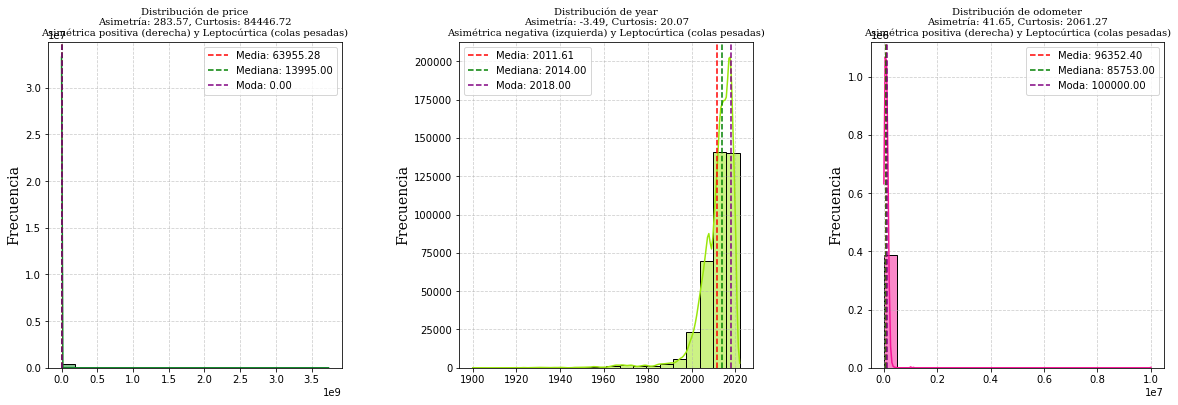

In [20]:
drawHistograms(cars_df, colsAnalyst, 20, 3, 1)

**3b)** Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

In [21]:
from datetime import datetime
current_year = datetime.now().year
cars_df['age'] = current_year - cars_df['year']
cars_df.drop('year', axis=1, inplace=True)
display(cars_df.tail())

,region,region_url,price,manufacturer,model,fuel,odometer,title_status,transmission,type,state,age
426875,wyoming,https://wyoming.craigslist.org,23590,nissan,maxima s sedan 4d,gas,32226.0,clean,other,sedan,wy,5.0
426876,wyoming,https://wyoming.craigslist.org,30590,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,wy,4.0
426877,wyoming,https://wyoming.craigslist.org,34990,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,wy,4.0
426878,wyoming,https://wyoming.craigslist.org,28990,lexus,es 350 sedan 4d,gas,30112.0,clean,other,sedan,wy,6.0
426879,wyoming,https://wyoming.craigslist.org,30590,bmw,4 series 430i gran coupe,gas,22716.0,clean,other,coupe,wy,5.0


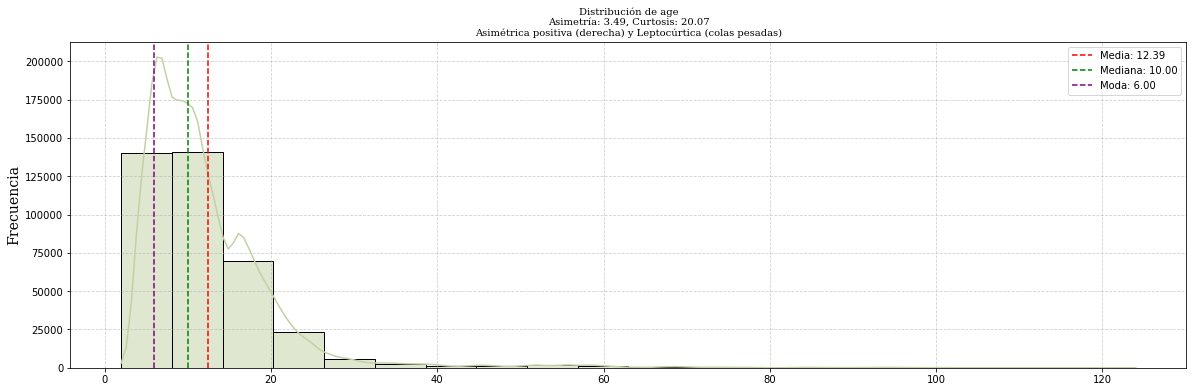

In [25]:
drawHistograms(cars_df, ['age'], 20, 1, 1)

**4a)** Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

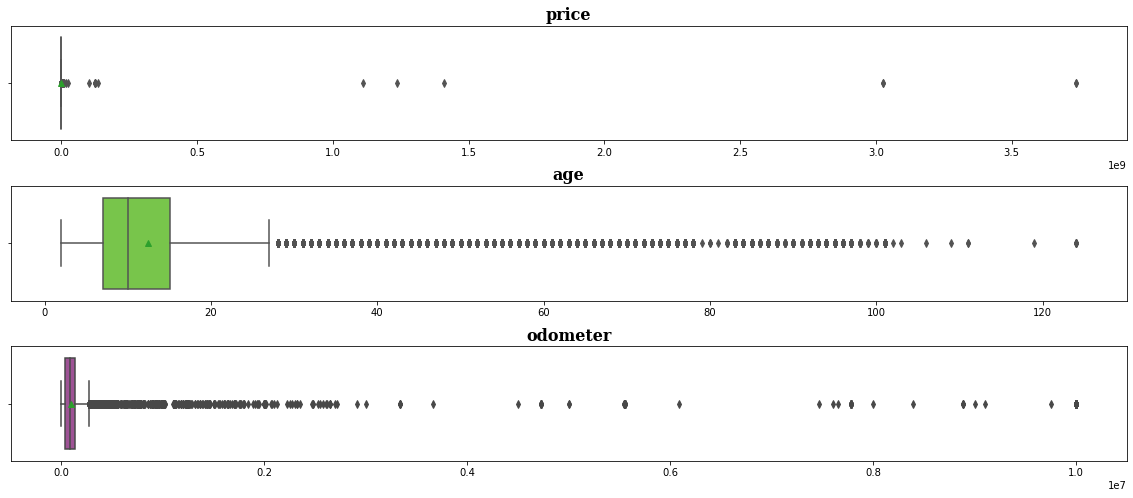

In [26]:
colsAnalyst  = ['price', 'age', 'odometer']

figBP, axesBP = plt.subplots(3,1, figsize=(20,8))
axesBP = axesBP.ravel()
plt.subplots_adjust(hspace=0.4)

for col, ax in zip(cars_df[colsAnalyst], axesBP):
    color = color_aleatorio_hex()
    sns.boxplot(x=cars_df[col], ax=ax, showmeans=True, color=color )
    ax.set(xlabel=None)
    ax.set_title(f'{col}', fontweight='bold', fontname='serif', fontsize= 16)

Se observa que si tienen valores atípicos las 3 variables

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

**4b)** Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se han eliminado en total hasta ahora?

In [27]:
acumuladorRecordsEraseOutliers = 0

def calculateAndEraseOutliers(df, listCols):
    global acumuladorRecordsEraseOutliers
    for col in listCols:
        # Calcula el primer y tercer cuartil (Q1 y Q3)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        # Calcula el rango intercuartil (IQR)
        IQR = Q3 - Q1
        # Calcula los límites inferior y superior
        lowerBound = Q1 - 1.5 * IQR
        upperBound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lowerBound) | (df[col] > upperBound)]
        outliersDf = outliers.copy()
        # Eliminar los valores atípicos del conjunto de datos original
        df.drop(outliersDf.index, inplace=True)
        
        # Mostrar el número de valores atípicos
        display(f"Número de valores atípicos en '{col}': {len(outliersDf)}")
        display(f"Porcentaje de los registros de la columna '{col}' de valores atípicos:  { (len(outliersDf)/df.shape[0]) *100 }%")
        acumuladorRecordsEraseOutliers = acumuladorRecordsEraseOutliers + len(outliersDf)
        color =color_aleatorio_hex()
        # Vuelve a graficar el la variable para corroborar que ya no tenga valores atípicos
        sns.boxplot(x=df[col], color=color)
        plt.show()

'Registros antes : 389604'

"Número de valores atípicos en 'price': 6656"

"Porcentaje de los registros de la columna 'price' de valores atípicos:  1.7380949893980382%"

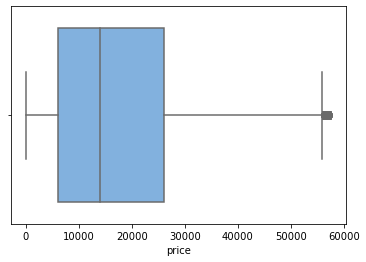

"Número de valores atípicos en 'age': 11752"

"Porcentaje de los registros de la columna 'age' de valores atípicos:  3.1659823920516383%"

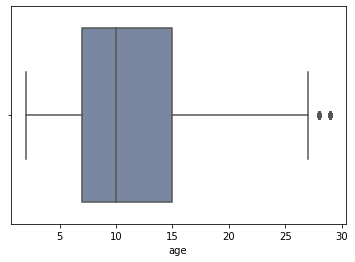

"Número de valores atípicos en 'odometer': 2763"

"Porcentaje de los registros de la columna 'odometer' de valores atípicos:  0.7499328236070059%"

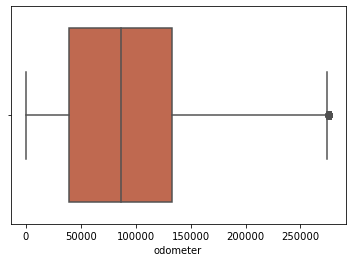

'Registros después : 368433'

In [28]:
display(f'Registros antes : {cars_df.shape[0]}')
calculateAndEraseOutliers(cars_df, colsAnalyst)
display(f'Registros después : {cars_df.shape[0]}')

En este apartado tuvimos dos respuestas diferentes debido a que hicimos dos funciones diferentes una que quitaba los valores atípicos al instante (en cada iteración) del DataFrame y otra que los quitaba después (al final), por lo que los porcentajes para cada columna cambiaban es decir que un registro con valor atípico era atípico en 2 o 3 columnas a la vez, se selecciono el que los borró al instante.

De igual manera dejamos los porcentajes de los que lo borraban al final siendo lo siguiente:

* Se encontraron 6656 outliers, lo que representa el 1.71% del total de registros
* Se encontraron 14209 outliers, lo que representa el 3.65% del total de registros
* Se encontraron 3226 outliers, lo que representa el 0.83% del total de registros

Aquí vemos como el primero coincide, pero los dos segundos ya no por lo antes descrito.

**NOTA**: Vimos que ambas respuestas eran correctas porque al final nos quedaban el mismo número de registros y el porcentaje de registros eliminados al momento era el mismo.

In [29]:
recordsWithoutOutliers = cars_df.shape[0]
print(f'''Después de la eliminación de los valores atípicos de las columnas: {colsAnalyst} aunado a los registros que eliminamos antes 
      se han eliminado un { 100 - ((recordsWithoutOutliers*100)/totalRecords) }% del porcentaje inicial de registros ''')

Después de la eliminación de los valores atípicos de las columnas: ['price', 'age', 'odometer'] aunado a los registros que eliminamos antes 
      se han eliminado un 13.691669790104953% del porcentaje inicial de registros 


**4c)** Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

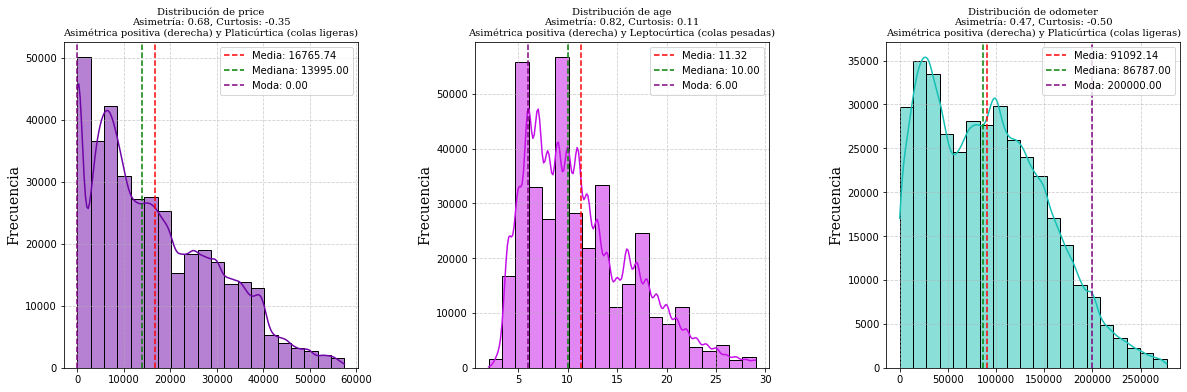

In [30]:
drawHistograms(cars_df, colsAnalyst, 20, 3, 1)

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

**5a)** Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


In [31]:
def diagnostic_plots(df, variable):

    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # histogram
    color = color_aleatorio_hex()
    sns.histplot(x=df[variable], bins=30, kde=True, color=color, ax=axes[0])
    axes[0].set_title(f"Histograma de {variable}", fontweight='bold', fontname='serif', fontsize= 16)

    # q-q plot
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    axes[1].set_title(f"Gráfica Q-Q de {variable}", fontweight='bold', fontname='serif', fontsize= 16)

    plt.show()

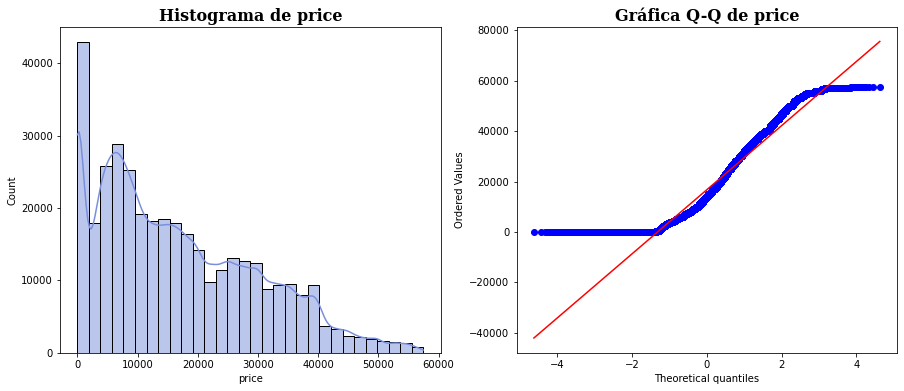

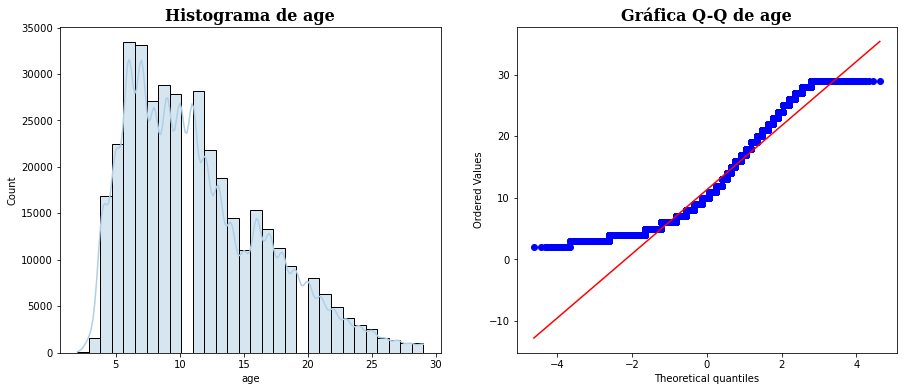

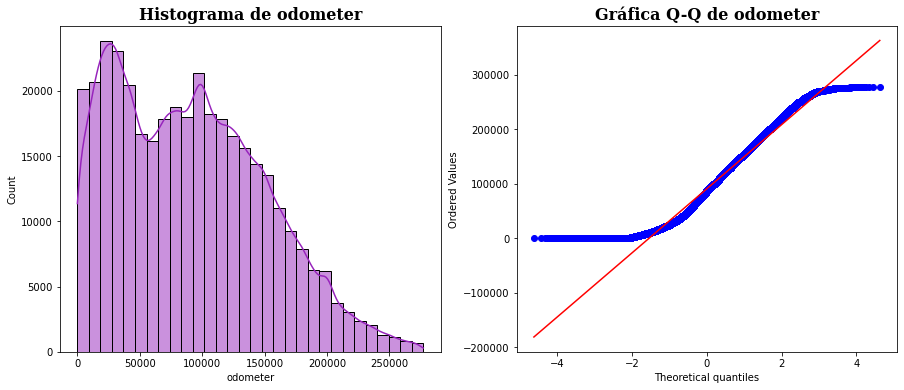

In [32]:
for col in colsAnalyst:
    diagnostic_plots(cars_df, col)

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

Recuerda que en `PowerTransformer()` el parámetro `standardize` por defecto es `True`. Con esto, después de hacer la transformación, el resultado se escala con *Z-score*, haciendo que la media sea 0 y la desviación estándar 1. Como en el ejercicio 6 ocuparás Min-Max para escalar, haz `standardize=False` para omitir el escalamiento en esta fase.

**5b)** Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Coloca el resultado en un dataframe denominado `transf_df` que contenga sólo las variables transformadas.

In [34]:
# Transformación de las variables numéricas sesgadas
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='yeo-johnson', standardize=False)
transf = transformer.fit_transform(cars_df[colsAnalyst])
transf_df = pd.DataFrame(transf, columns=transformer.get_feature_names_out())
display(transf_df)

,price,age,odometer
0,193.563980,2.387912,625.632001
1,163.225489,2.695321,698.226485
2,207.706309,1.604936,347.483442
3,186.983245,2.071931,521.567174
4,136.831542,2.474186,952.940342
...,...,...,...
368428,166.295214,1.786181,458.182655
368429,185.942956,1.604936,271.179380
368430,196.986291,1.604936,154.051753
368431,181.701485,1.939332,441.951156


**5c)** Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

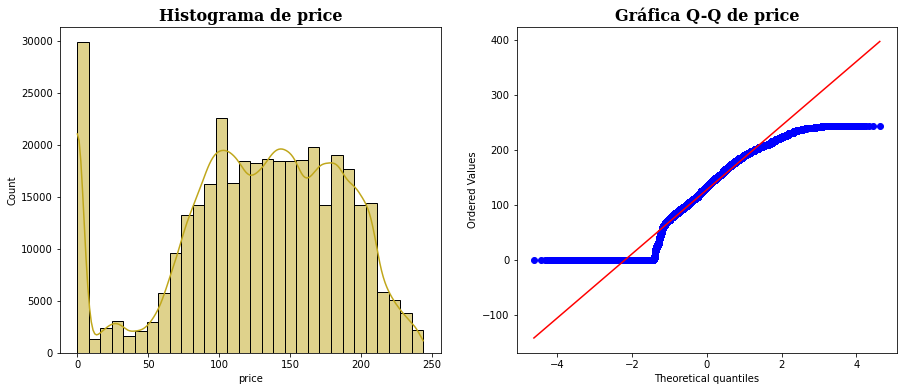

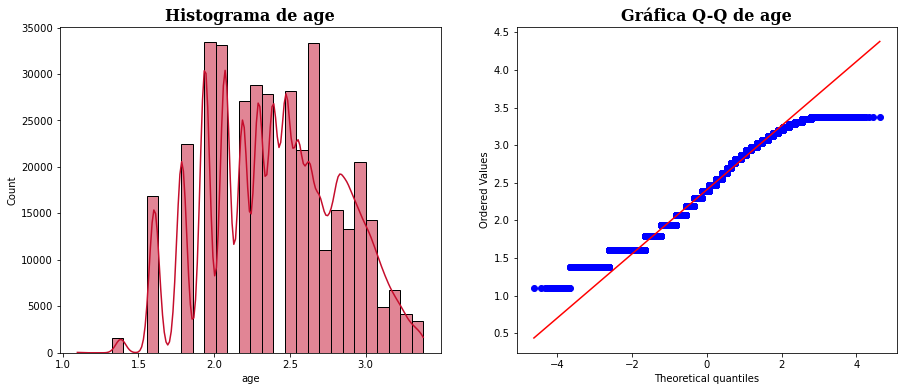

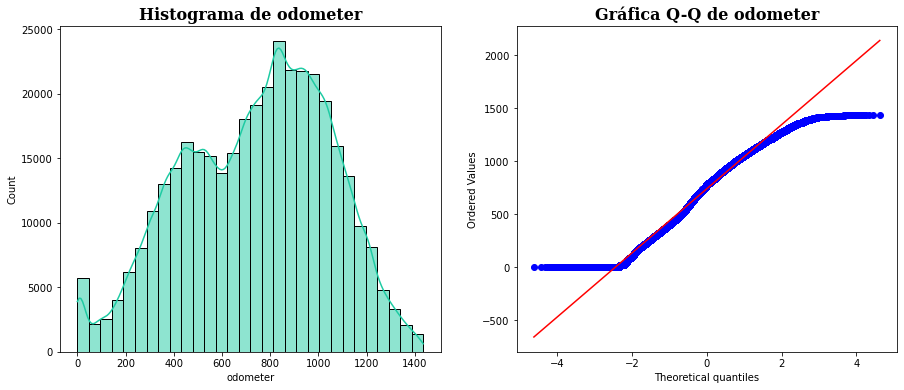

In [35]:
for col in colsAnalyst:
    diagnostic_plots(transf_df, col)

## Escalando variables numéricas

**6a)** Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Coloca el resultado en un dataframe denominado `minmax_df`.


In [36]:
# Escalamiento de las variables numéricas sesgadas
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
minmax = scaler.fit_transform(transf_df)
minmax_df = pd.DataFrame(minmax, columns=scaler.get_feature_names_out())
display(minmax_df)

,price,age,odometer
0,0.794413,0.565257,0.435888
1,0.669900,0.699813,0.486465
2,0.852455,0.222541,0.242097
3,0.767405,0.426949,0.363384
4,0.561575,0.603020,0.663928
...,...,...,...
368428,0.682498,0.301874,0.319223
368429,0.763135,0.222541,0.188935
368430,0.808459,0.222541,0.107330
368431,0.745728,0.368910,0.307914


**6b)** Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

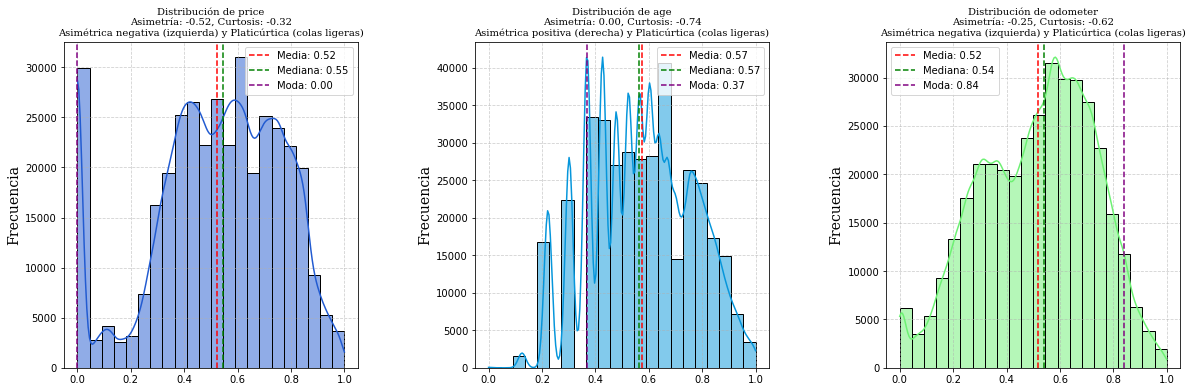

In [37]:
drawHistograms(minmax_df, colsAnalyst, 22, 3, 1)

## Codificando variables categóricas

**7a)** Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [39]:
describeVarsCategories = (cars_df.select_dtypes(exclude='number')).describe().T
display( describeVarsCategories) 

,count,unique,top,freq
region,368433,404,columbus,3201
region_url,368433,413,https://grandrapids.craigslist.org,2745
manufacturer,368433,40,ford,62162
model,368433,19314,f-150,7477
fuel,368433,5,gas,313944
title_status,368433,6,clean,356757
transmission,368433,3,automatic,293338
type,368433,13,sedan,155206
state,368433,51,ca,42333


**7b)** Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente. Una variable es considerada de alta cardinalidad cuando tiene cientos de valores únicos.

In [40]:
highly_cardinal_variables = cars_df[(describeVarsCategories[(describeVarsCategories['unique'] >= 100) ].index).to_list()]
few_cardinal_variables = cars_df[(describeVarsCategories[(describeVarsCategories['unique'] < 100) ].index).to_list()]
display('highly_cardinal_variables')
display(highly_cardinal_variables.tail())
display('few_cardinal_variables')
display(few_cardinal_variables.tail())

'highly_cardinal_variables'

,region,region_url,model
426875,wyoming,https://wyoming.craigslist.org,maxima s sedan 4d
426876,wyoming,https://wyoming.craigslist.org,s60 t5 momentum sedan 4d
426877,wyoming,https://wyoming.craigslist.org,xt4 sport suv 4d
426878,wyoming,https://wyoming.craigslist.org,es 350 sedan 4d
426879,wyoming,https://wyoming.craigslist.org,4 series 430i gran coupe


'few_cardinal_variables'

,manufacturer,fuel,title_status,transmission,type,state
426875,nissan,gas,clean,other,sedan,wy
426876,volvo,gas,clean,other,sedan,wy
426877,cadillac,diesel,clean,other,hatchback,wy
426878,lexus,gas,clean,other,sedan,wy
426879,bmw,gas,clean,other,coupe,wy


**7c)** Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

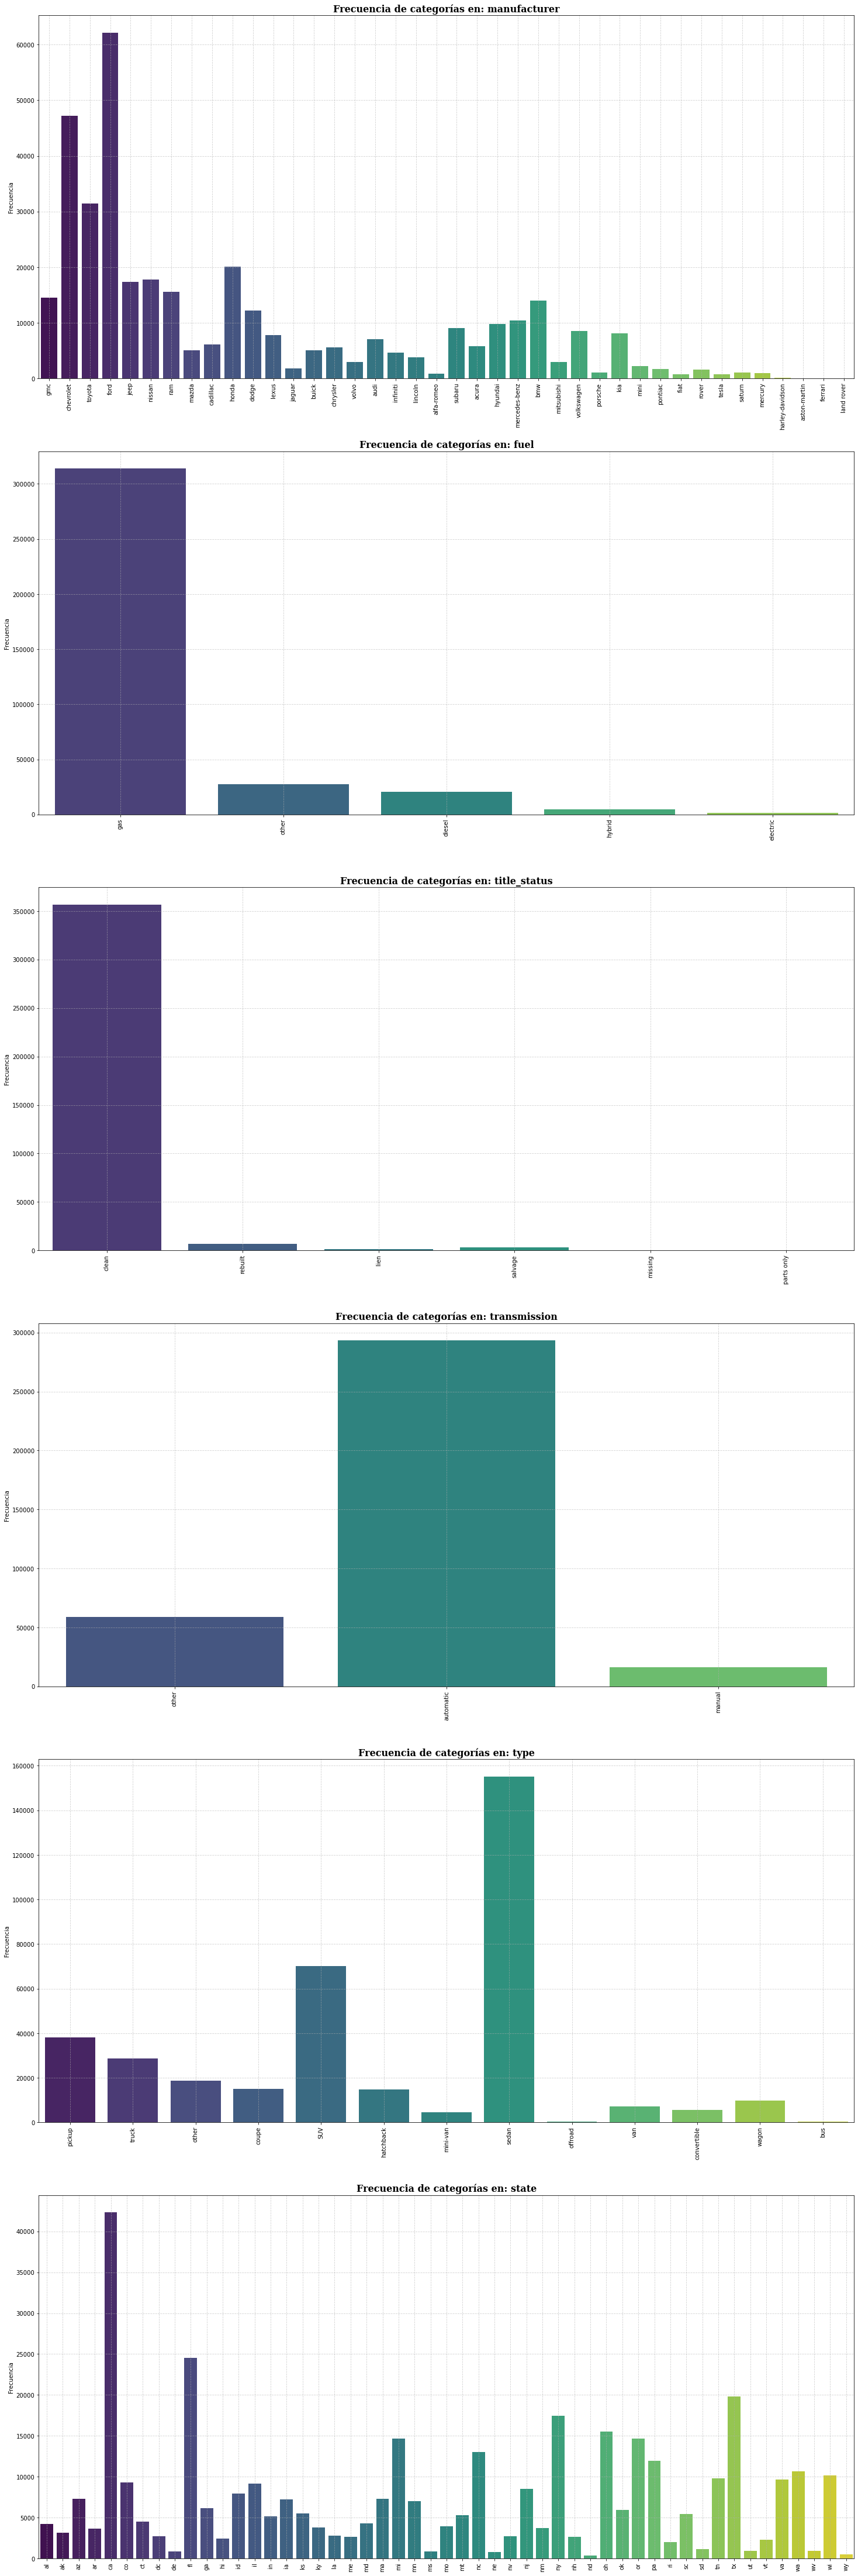

In [71]:
fig, axesC =  plt.subplots(6,1, figsize=(25,80))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
axesC= axesC.ravel()
for col, ax in zip(few_cardinal_variables, axesC):
    # color = color_aleatorio_hex()
    sns.countplot(x=few_cardinal_variables[col], ax=ax, data=few_cardinal_variables, palette='viridis')
    ax.set(xlabel=None, ylabel='Frecuencia')
    ax.set_title(f'Frecuencia de categorías en: {col}', fontweight='bold', fontname='serif', fontsize= 16)
    ax.tick_params(axis='x',rotation=90)
    ax.grid(True, linestyle='--', alpha=0.6)

**8.** Aplica codificación *one-hot* a las variables en `few_cardinal_variables`, borrando la primera categoría (`drop='first'`). Coloca el resultado en un dataframe denominado `onehot_df`.

In [72]:
# Codificación de las variables categóricas de texto
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(few_cardinal_variables)
onehot_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
display(onehot_df)

,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_ferrari,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
368429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
368430,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
368431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**9.** Aplica codificación binaria a las variables en `highly_cardinal_variables`. Coloca el resultado en un dataframe denominado `binary_df`.

In [73]:
from category_encoders.binary import BinaryEncoder
encoderBinary = BinaryEncoder()
encoded_data = encoderBinary.fit_transform(highly_cardinal_variables)
binary_df = pd.DataFrame(encoded_data, columns=encoderBinary.get_feature_names_out())
display(binary_df)

,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_url_0,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
27,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
28,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
29,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
30,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
31,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,1,1,0,0,1,0,1,0,0,1,...,1,1,0,0,1,0,1,1,0,1
426876,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,1,1,0,1,1,1
426877,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,1,0,1,1
426878,1,1,0,0,1,0,1,0,0,1,...,1,1,1,1,0,0,0,0,1,1


**10.** Concatena los dataframes obtenidos: `minmax_df` (cuyas variables numéricas ya están transformadas y escaladas) y las codificaciones anteriores (`onehot_df` y `binary_df`). Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [74]:
minmax_df.reset_index(drop=True, inplace=True)
onehot_df.reset_index(drop=True, inplace=True)
binary_df.reset_index(drop=True, inplace=True)

dfConcatenate = pd.concat([minmax_df, onehot_df, binary_df], axis=1)
display(dfConcatenate)

,price,age,odometer,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
0,0.794413,0.565257,0.435888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.669900,0.699813,0.486465,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,0.852455,0.222541,0.242097,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,1
3,0.767405,0.426949,0.363384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0.561575,0.603020,0.663928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368428,0.682498,0.301874,0.319223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,1,0,1,1,0,1
368429,0.763135,0.222541,0.188935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,1,1,1
368430,0.808459,0.222541,0.107330,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,1,1,0,1,1
368431,0.745728,0.368910,0.307914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,0,0,0,0,1,1


In [76]:
dfConcatenate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368433 entries, 0 to 368432
Columns: 148 entries, price to model_14
dtypes: float64(115), int64(33)
memory usage: 416.0 MB
